## 4. Load the wine data set into Python. Choose 10 fold cross validation (cross_val_score). Run the
## Naïve Bayes and the k-Nearest neighbor (for k=1, 10, 60, 100) classifiers. Compare and analyze
## their performances. (5 points)

In [234]:
import numpy as np
import pandas as pd
from sklearn import datasets
data_sk = datasets.load_wine()

In [235]:
x = data_sk.data
y = data_sk.target

In [236]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()


In [237]:
CVS_gnb = cross_val_score(gnb,x,y,cv=10)
CVS_gnb

array([0.94444444, 1.        , 1.        , 0.94444444, 0.94444444,
       1.        , 1.        , 0.94444444, 1.        , 1.        ])

In [238]:
mean_CVS_gnb = np.mean(CVS_gnb)
mean_CVS_gnb

0.9777777777777779

In [239]:
from sklearn.neighbors import KNeighborsClassifier
neigh_1 = KNeighborsClassifier(n_neighbors=1)
neigh_10 = KNeighborsClassifier(n_neighbors=10)
neigh_60 = KNeighborsClassifier(n_neighbors=60)
neigh_100 = KNeighborsClassifier(n_neighbors=100)
CVS_knn_1 = cross_val_score(neigh_1,x,y,cv=10)
CVS_knn_10 = cross_val_score(neigh_10,x,y,cv=10)
CVS_knn_60 = cross_val_score(neigh_60,x,y,cv=10)
CVS_knn_100 = cross_val_score(neigh_100,x,y,cv=10)

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

In [240]:
mean_CVS_knn1 = np.mean(CVS_knn_1)
mean_CVS_knn10 = np.mean(CVS_knn_10)
mean_CVS_knn60 = np.mean(CVS_knn_60)
mean_CVS_knn100 = np.mean(CVS_knn_100)

print(f'K = 1 mean f_score: {mean_CVS_knn1}\n\
K = 10 mean f_score: {mean_CVS_knn10}\n\
K = 60 mean f_score: {mean_CVS_knn60}\n\
K = 100 mean f_score: {mean_CVS_knn100}\n\
gnb mean f_score: {mean_CVS_gnb}\n\
K = 10 mean f_score is the best')


K = 1 mean f_score: 0.7480392156862745
K = 10 mean f_score: 0.6973856209150326
K = 60 mean f_score: 0.7199346405228757
K = 100 mean f_score: 0.6820261437908497
gnb mean f_score: 0.9777777777777779
K = 10 mean f_score is the best


## 5. Demonstrate how the perceptron can be used to represent the AND and OR functions between a pair of Boolean variables. (3 points)


In [241]:
def AND(input1,input2):
    result = input1*1 + input2*1 - 1.5
    if result < 0:
        return False
    else:
        return True

In [242]:
print(f'input pairt is (0,0) AND function returns {AND(0,0)}\n \
        input pairt is (1,0) AND function returns {AND(1,0)}\n \
        input pairt is (0,1) AND function returns {AND(0,1)}\n \
        input pairt is (1,1) AND function returns {AND(1,1)}\n')

input pairt is (0,0) AND function returns False
         input pairt is (1,0) AND function returns False
         input pairt is (0,1) AND function returns False
         input pairt is (1,1) AND function returns True



In [243]:
def OR(input1,input2):
    result = input1*1 + input2*1 - 0.5
    if result < 0:
        return False
    else:
        return True

In [244]:
print(f'input pairt is (0,0) OR function returns {OR(0,0)}\n \
        input pairt is (1,0) OR function returns {OR(1,0)}\n \
        input pairt is (0,1) OR function returns {OR(0,1)}\n \
        input pairt is (1,1) OR function returns {OR(1,1)}\n')

input pairt is (0,0) OR function returns False
         input pairt is (1,0) OR function returns True
         input pairt is (0,1) OR function returns True
         input pairt is (1,1) OR function returns True



## 6. Transform the categorical predictors with more than two categories into dummy
## variables (binary variable for each category), partition the data into 60% training and 40% test
## (use train_test_split with random state = 10)

In [245]:
UB_data = pd.read_excel('/Users/chriz_yu/Documents/MSU/CSE 801/UniversalBank.xlsx', sheet_name='Data')
UB_data = UB_data.drop(columns=['ID'])
UB_data

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [246]:
UB_data = pd.get_dummies(UB_data,columns=['Family','Education'])
x = UB_data.drop(columns=['Personal Loan', 'ZIP Code'],axis=1)
y = UB_data['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 10)

In [247]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
customer = {'Age':40,'Experience':10, 'Income':84, 'CCAvg':2, 'Mortgage':0,'Securities Account':0, 'CD Account':0, 'Online':1,
       'CreditCard':1, 'Family_1':0, 'Family_2':1, 'Family_3':0, 'Family_4':0,
       'Education_1':0, 'Education_2':1, 'Education_3':0}
customer = pd.DataFrame(customer, index=[0]) 
y_pred_neigh = knn.predict(customer)

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [248]:
from  sklearn.metrics import precision_recall_fscore_support as f_score
train_f = []
test_f =[]

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_train = knn.predict(X_train)
    pred_test = knn.predict(X_test)
    p,r,f,s, = f_score(y_train,pred_train)
    p2,r2,f2,s2, = f_score(y_test,pred_test)
    train_f.append(f[1])
    test_f.append(f2[1])



/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

Text(0, 0.5, 'F_score')

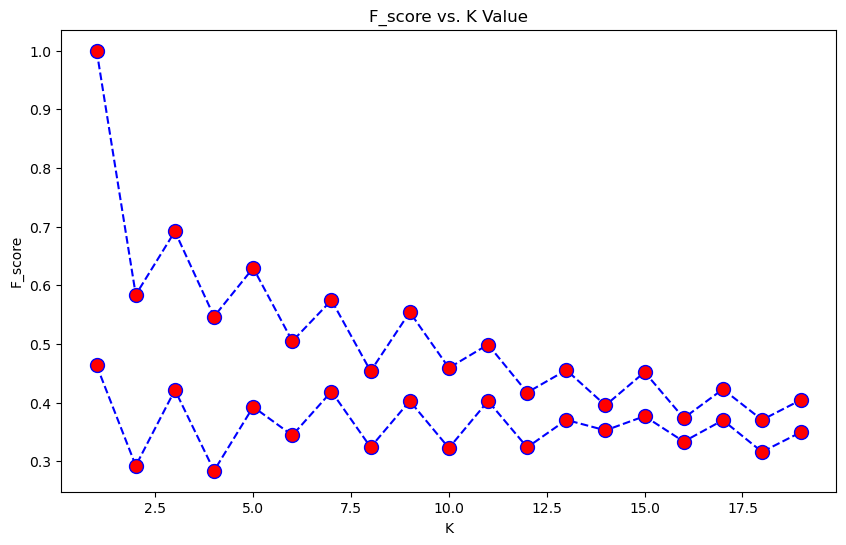

In [249]:
import  matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(list(range(1,20)),train_f,list(range(1,20)),test_f,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('F_score vs. K Value')
plt.xlabel('K')
plt.ylabel('F_score')

In [250]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_neigh = knn.predict(X_test)

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [251]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_neigh)

array([[1708,  108],
       [  96,   88]])

In [252]:
knn.predict(customer)

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([0])

### this customer be classified as a no-load person

## e. Repartition the data, this time into 50% training, 30% validation, and 20% test (hint: split
## into training/test, then split test set into validation and test). Apply k-NN method with
## the best k chosen above. Show the confusion matrices for the training, validation, and
## test sets. Comment on their differences and reasons.

In [253]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.5, random_state = 42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size = 0.6, random_state = 42)

In [254]:
train_f = []
valid_f = []
test_f =[]

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_train = knn.predict(X_train)
    pred_valid = knn.predict(X_valid)
    pred_test = knn.predict(X_test)

    p,r,f,s, = f_score(y_train,pred_train)
    p2,r2,f2,s2, = f_score(y_valid,pred_valid)
    p3,r3,f3,s3, = f_score(y_test,pred_test)
    train_f.append(f[1])
    valid_f.append(f2[1])
    test_f.append(f3[1])


/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

Text(0, 0.5, 'F_score')

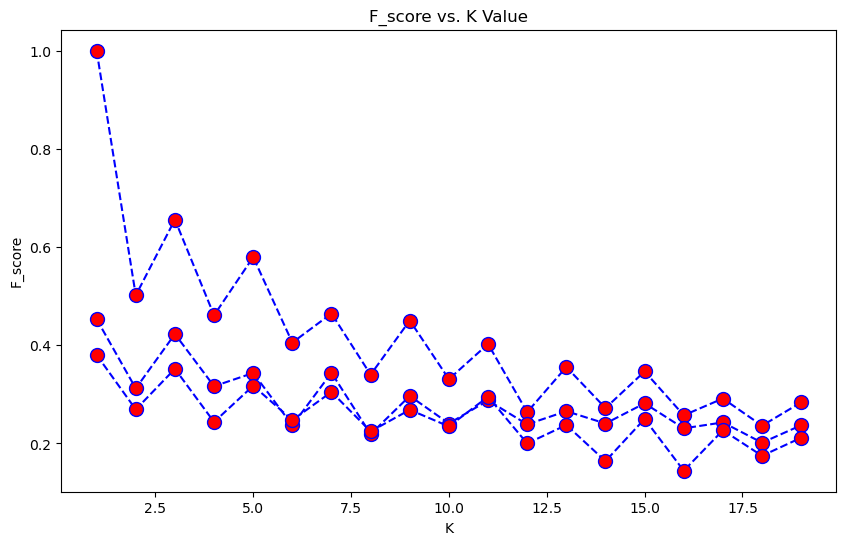

In [255]:
plt.figure(figsize=(10,6))
plt.plot(list(range(1,20)),train_f,list(range(1,20)),valid_f,list(range(1,20)),test_f,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('F_score vs. K Value')
plt.xlabel('K')
plt.ylabel('F_score')

In [256]:
neigh = KNeighborsClassifier(n_neighbors=1)
y_pred_neigh = neigh.fit(X_train, y_train).predict(X_train)
confusion_matrix(y_train, y_pred_neigh)

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[2276,    0],
       [   0,  224]])

In [257]:
neigh = KNeighborsClassifier(n_neighbors=1)
y_pred_neigh = neigh.fit(X_train, y_train).predict(X_valid)
confusion_matrix(y_valid, y_pred_neigh)

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[843,  50],
       [ 61,  46]])

In [258]:
neigh = KNeighborsClassifier(n_neighbors=1)
y_pred_neigh = neigh.fit(X_valid, y_valid).predict(X_test)
confusion_matrix(y_test, y_pred_neigh)

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[1265,   86],
       [  87,   62]])

## f. Repartition the data with a different random seed. Find the best k (similar to part b)
## and show the confusion matrix for the validation data. Report k and random seed.
## Comment on the differences between these results and part b.

In [259]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.5, random_state = 11)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size = 0.6, random_state = 11)

In [260]:
train_f = []
valid_f = []
test_f =[]

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_train = knn.predict(X_train)
    pred_valid = knn.predict(X_valid)
    pred_test = knn.predict(X_test)

    p,r,f,s, = f_score(y_train,pred_train)
    p2,r2,f2,s2, = f_score(y_valid,pred_valid)
    p3,r3,f3,s3, = f_score(y_test,pred_test)
    train_f.append(f[1])
    valid_f.append(f2[1])
    test_f.append(f3[1])

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and t

Text(0, 0.5, 'F_score')

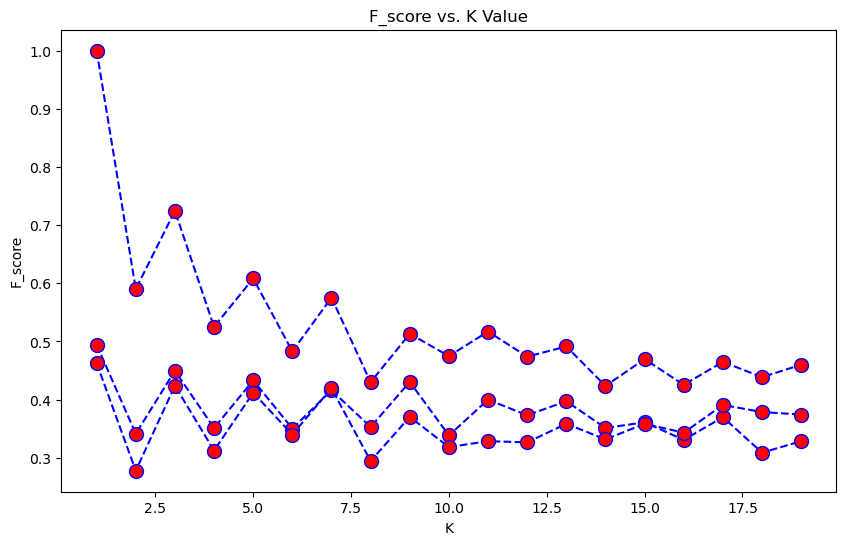

In [261]:
plt.figure(figsize=(10,6))
plt.plot(list(range(1,20)),train_f,list(range(1,20)),valid_f,list(range(1,20)),test_f,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('F_score vs. K Value')
plt.xlabel('K')
plt.ylabel('F_score')

In [262]:
neigh = KNeighborsClassifier(n_neighbors=1)
y_pred_neigh = neigh.fit(X_train, y_train).predict(X_train)
confusion_matrix(y_train, y_pred_neigh)

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[2242,    0],
       [   0,  258]])

In [263]:
neigh = KNeighborsClassifier(n_neighbors=1)
y_pred_neigh = neigh.fit(X_train, y_train).predict(X_valid)
confusion_matrix(y_valid, y_pred_neigh)

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[866,  44],
       [ 46,  44]])

In [264]:
neigh = KNeighborsClassifier(n_neighbors=1)
y_pred_neigh = neigh.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test, y_pred_neigh)

/Users/chriz_yu/opt/anaconda3/envs/CSE801/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([[1304,   64],
       [  73,   59]])